# Hypothesis analysis of online store development

The following tasks should be accomplished as part of this study:
- prepare a list of hypotheses for revenue growth
- prioritize the hypotheses in the list
- run an A/B test to test the selected hypotheses
- analyze the results of the A/B-test and make recommendations for further actions

**Summary**:  
Conducted hypothesis prioritization on the ICE and RICE frameworks. Then I analyzed the results of the A/B-test and plotted the cumulative revenue, average check, conversion by groups, and then calculated the statistical significance of differences in conversions and average checks on raw and purified data. Based on the analysis, I decided that it was inexpedient to continue the test.

## import libs

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats as st
import numpy as np

# set options
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:20,.2f}'.format


## data reading

In [2]:
# read data

try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('datasets\\hypothesis.csv')
    orders = pd.read_csv('datasets\\orders.csv')
    visitors = pd.read_csv('datasets\\visitors.csv')

## data cleaning

In [3]:
# lowercase for columns' headers
hypothesis.columns = [x.lower() for x in hypothesis.columns]

# datetime in orders
orders.date = pd.to_datetime(orders.date)

# datetime in visitors
visitors.date = pd.to_datetime(visitors.date)

## hypothesis prioritizing

### ICE framework

In [4]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis['ICE_priority'] = hypothesis.ICE.rank(method='max', ascending=False)
display(hypothesis.sort_values('ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_priority
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,1.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,3.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,5.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,6.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,9.00


### RICE framework

In [5]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis['RICE_priority'] = hypothesis.RICE.rank(method='max', ascending=False)
display(hypothesis.sort_values('RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,ICE_priority,RICE,RICE_priority
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,3.00,112.00,1.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,5.00,56.00,2.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2.00,40.00,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,4.00,40.00,4.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,1.00,16.20,5.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.00,9.00,6.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,6.00,4.00,8.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7.00,4.00,8.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,9.00,3.00,9.00


### conclusion

When applying the RICE methodology, the following changes occurred in the priorities of hypothesis implementation:
- six hypotheses changed their priority
- the priority of hypotheses #6, 1, 4 did not change
- The highest-priority hypothesis to analyze: "Add a subscription form to all main pages to gather a customer base for email newsletters"

The changes were due to the fact that the RICE methodology in addition to the Impact, Confidence, Effort (Ease) factors takes into account an additional factor Reach, which allows prioritizing hypotheses (tasks) depending on the potential audience reach. 

Translated with www.DeepL.com/Translator (free version)

## A/B test

A/B test parameters:
- There are two groups in the test
- test start date: 2019-08-01
- test end date: 2019-08-31
- the groups are balanced as follows:
    - group A 46.2%
    - group B 53.8%

In [6]:
check = orders.groupby('group',as_index=False).agg({'visitorId':'nunique'})
check['share'] = check.visitorId / check.visitorId.sum()
display(check)

,group,visitorId,share
0,A,503,0.46
1,B,586,0.54


In [7]:
# проверка ошибок разделения пользователей на группы 
wrong_visitors = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'}).query('group > 1')['visitorId']
print('wrong visitors', len(wrong_visitors))
print('share of wrong visitors, %:', round(len(wrong_visitors) / orders.visitorId.nunique() * 100, 1))
# orders = orders.query('~visitorId.isin(@wrong_visitors)')

# проверка явных дубликатов
print('duplicates')
display(orders[orders.duplicated()])
display(visitors[visitors.duplicated()])

# проверка пустых значений
print('empty values')
display(orders.isna().sum())
display(visitors.isna().sum())


wrong visitors 58
share of wrong visitors, %: 5.6
duplicates


,transactionId,visitorId,date,revenue,group


,date,group,visitors


empty values


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [8]:
# подготовка кумулятивных данных для группы A

# separate group A
A = orders.query('group == "A"')

# group and aggregate data by days 
A = A.groupby('date', as_index=False).agg({
    'group':'max', 
    'revenue':'sum', 
    'transactionId':'nunique', 
    'visitorId':'nunique'
    })

# rename columns
A = A.rename(columns={'transactionId':'orders', 'visitorId':'customers'})

# add cumulative data
A['cum_revenue'] = A.apply(lambda x: A[A.date <= x.date].agg({'revenue':'sum'}), axis=1)
A['cum_orders'] = A.apply(lambda x: A[A.date <= x.date].agg({'orders':'sum'}), axis=1)
A['cum_customers'] = A.apply(lambda x: A[A.date <= x.date].agg({'customers':'sum'}), axis=1)

display(A.head())

,date,group,revenue,orders,customers,cum_revenue,cum_orders,cum_customers
0,2019-08-01,A,148579,24,20,148579,24,20
1,2019-08-02,A,93822,20,19,242401,44,39
2,2019-08-03,A,112473,24,24,354874,68,63
3,2019-08-04,A,70825,16,15,425699,84,78
4,2019-08-05,A,124218,25,25,549917,109,103


In [9]:
# подготовка кумулятивных данных для группы B

# separate group B
B = orders.query('group == "B"')

# group and aggregate data by days 
B = B.groupby('date', as_index=False).agg({
    'group':'max', 
    'revenue':'sum', 
    'transactionId':'nunique', 
    'visitorId':'nunique'
    })

# rename columns
B = B.rename(columns={'transactionId':'orders', 'visitorId':'customers'})

# add cumulative data
B['cum_revenue'] = B.apply(lambda x: B[B.date <= x.date].agg({'revenue':'sum'}), axis=1)
B['cum_orders'] = B.apply(lambda x: B[B.date <= x.date].agg({'orders':'sum'}), axis=1)
B['cum_customers'] = B.apply(lambda x: B[B.date <= x.date].agg({'customers':'sum'}), axis=1)

display(B.head())

,date,group,revenue,orders,customers,cum_revenue,cum_orders,cum_customers
0,2019-08-01,B,101217,21,20,101217,21,20
1,2019-08-02,B,165531,24,23,266748,45,43
2,2019-08-03,B,114248,16,16,380996,61,59
3,2019-08-04,B,108571,17,16,489567,78,75
4,2019-08-05,B,92428,23,23,581995,101,98


### cumulative revenue by group

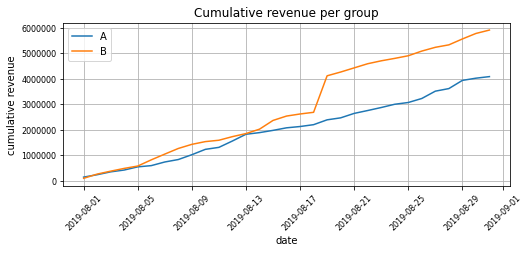

In [10]:
plt.figure(figsize=(8,3))

plt.plot(A.date, A.cum_revenue, label='A')
plt.plot(B.date, B.cum_revenue, label='B')

plt.legend()
plt.title('Cumulative revenue per group')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('cumulative revenue')
plt.xlabel('date')
plt.grid()
plt.show();


**conclusions**
- cumulative revenue in Group B is higher than in Group A
- there is a spike in Group B revenue between August 17 and 21. There is a possible outlier. Should be checked and removed if confirmed

### cumulative average check by group

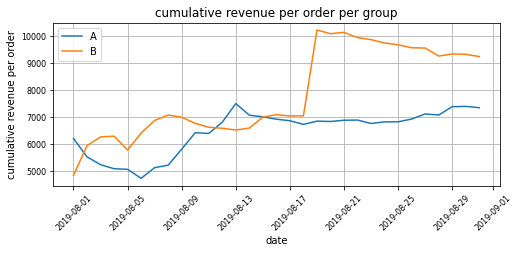

In [11]:
plt.figure(figsize=(8,3))

plt.plot(A.date, A.cum_revenue / A.cum_orders, label='A')
plt.plot(B.date, B.cum_revenue / B.cum_orders, label='B')

plt.legend()
plt.title('cumulative revenue per order per group')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('cumulative revenue per order')
plt.xlabel('date')
plt.grid()
plt.show();

**conclusions**
- Group B is also higher than Group A in terms of the average check
- The average receipt of Group A leveled off by the middle of August, but began to fluctuate again at the end of August. Perhaps they were caused by an increase in consumption before the school season. If there is an opportunity to look at the product groups which caused the growth of the average check, we will be able to confirm or refute this version. For now, we can assume that the test stabilized in mid-August.
- Group B's cumulative average check was heavily influenced by the spike between August 17 and 21 mentioned earlier. There is a growing suspicion of a spike 
- Group A cumulative average check was influenced by the rise on August 13

### the relative change in the cumulative average check of group B to group A

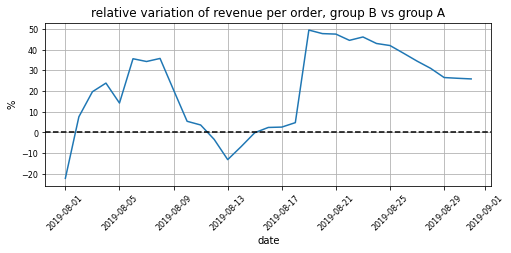

In [12]:
# объединим датасеты, чтобы посчитать относительное изменение метрики
merged = A.merge(B, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8,3))
merged
plt.plot(merged.date, ((merged.cum_revenueB / merged.cum_ordersB) / (merged.cum_revenueA / merged.cum_ordersA) - 1)*100)
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('relative variation of revenue per order, group B vs group A')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('%')
plt.xlabel('date')
plt.grid()
plt.show();

**conclusions**
- large fluctuations in the relative cumulative average check during the month
- test results fluctuated significantly several times
- abnormal purchases on spike dates in both groups could be the possible cause of the changes

### cumulative average number of orders per visitor by group

In [13]:
# добавим посетителей в датасеты каждой группы
A = A.merge(visitors.query('group =="A"')[['date', 'visitors']], on='date', how='left')
A['cum_visitors'] = A.apply(lambda x: A[A.date <= x.date].agg({'visitors':'sum'}), axis=1)

B = B.merge(visitors.query('group =="B"')[['date', 'visitors']], on='date', how='left')
B['cum_visitors'] = B.apply(lambda x: B[B.date <= x.date].agg({'visitors':'sum'}), axis=1)

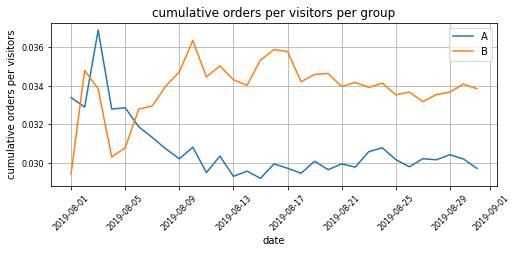

In [14]:
plt.figure(figsize=(8,3))

plt.plot(A.date, A.cum_orders / A.cum_visitors, label='A')
plt.plot(B.date, B.cum_orders / B.cum_visitors, label='B')

plt.legend()
plt.title('cumulative orders per visitors per group')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('cumulative orders per visitors')
plt.xlabel('date')
plt.grid()
plt.show();

**conclusion**
- the number of orders per visitor has stabilized by mid-August for both groups
- in both groups the fluctuations are noticeable: on the 10th-11th and 18th-19th of August
- it is impossible to explain the fluctuations in group B by the growth of visitors of this group, because the traffic in this group did not grow during the same period
- since the fluctuations were relatively synchronous in both groups, it can be assumed that they were caused by external factors or advertising activity
- we can preliminarily say that in group B customers ordered more often

### the relative change in the cumulative average number of orders per visitor of group B to group A

In [15]:
# объединим датасеты, чтобы посчитать относительное изменение метрики
merged = A.merge(B, on='date', how='left', suffixes=['A', 'B'])

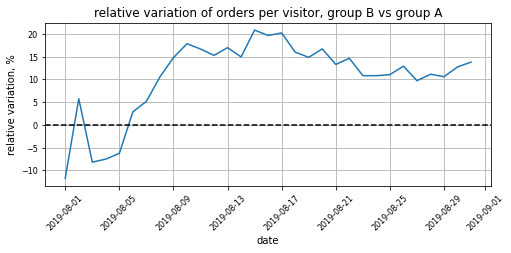

In [16]:
plt.figure(figsize=(8,3))
plt.plot(merged.date, ((merged.cum_ordersB / merged.cum_visitorsB) / (merged.cum_ordersA / merged.cum_visitorsA) - 1) *100)
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('relative variation of orders per visitor, group B vs group A')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('relative variation, %')
plt.xlabel('date')
plt.grid()
plt.show();

**conclusions**
- the metric shows strong fluctuations over the period
- group B was regularly higher than group A in the number of orders per visitor. This means that visitors of group B are more often (=more likely) to make purchases 

### number of orders by user

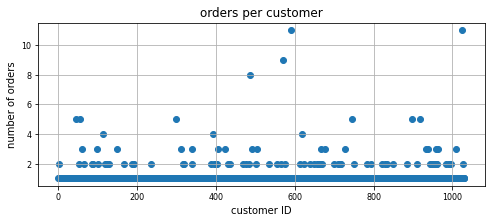

In [17]:
# сформируем данные о заказах по пользователям
orders_per_customer = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_per_customer.columns = ['visitorId', 'orders']

# построим график
plt.figure(figsize=(8,3))
x_values = pd.Series(range(0, len(orders_per_customer)))
plt.scatter(x_values, orders_per_customer.orders)
plt.title('orders per customer')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('number of orders')
plt.xlabel('customer ID')
plt.grid()
plt.show();

**conclusions**
- visually, most users made 1-2 orders during the whole period
- there are users who stand out from the normal picture:
    - 2 users made 11 orders
    - 1 user - 9 orders
    - 1 user - 8 orders
- It is worth getting rid of these anomalous orders in the dataset before you move on to statistical tests. They will significantly affect the results of statistical tests

In [18]:
print('95ый перцентиль количества заказов на пользователя ', np.percentile(orders_per_customer.orders, 95))
print('99ый перцентиль количества заказов на пользователя ', np.percentile(orders_per_customer.orders, 99))

95ый перцентиль количества заказов на пользователя  2.0
99ый перцентиль количества заказов на пользователя  4.0


**conclusion**
- Users who have made more than 4 orders will be deleted when clearing

### revenue by orders

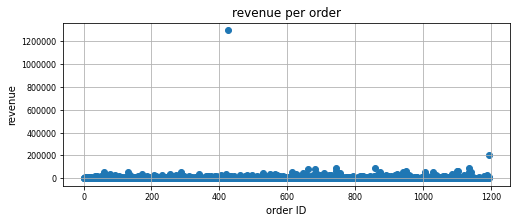

In [19]:
plt.figure(figsize=(8,3))
x_values = pd.Series(range(0, len(orders)))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x_values, orders.revenue)
plt.title('revenue per order')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('revenue')
plt.xlabel('order ID')
plt.grid()
plt.show();

**сonclusion**
- visually, most orders do not exceed 100,000 in value
- there are two anomalies:
    - 1 order worth more than 1,200,000
    - 1 order of 200 000

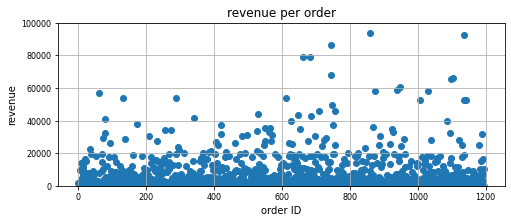

count               1,197.00
mean                8,348.01
std                39,191.13
min                    50.00
25%                 1,220.00
50%                 2,978.00
75%                 8,290.00
max             1,294,500.00
Name: revenue, dtype: float64

In [20]:
plt.figure(figsize=(8,3))
x_values = pd.Series(range(0, len(orders)))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x_values, orders.revenue)
plt.title('revenue per order')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('revenue')
plt.ylim(0,100000)
plt.xlabel('order ID')
plt.grid()
plt.show();
orders.revenue.describe()

In [21]:
print('95ый перцентиль стоимости заказов', round(np.percentile(orders.revenue, 95),2))
print('99ый перцентиль стоимости заказов', round(np.percentile(orders.revenue, 99),2))

95ый перцентиль стоимости заказов 28000.0
99ый перцентиль стоимости заказов 58233.2


**Conclusion**  
In this case I will also be guided by the 99th percentile. Orders worth more than 58,233.2 will be considered abnormal

### statistical significance of differences in the average number of orders per visitor between groups according to "raw" data

Mann-Whitney U-test will be used to test the hypotheses of this A/B test, since the data do not follow a normal distribution and using Student's T-criterion will not give an accurate result

H0: the average number of orders per visitor in groups A and B does not differ

H1: the average number of orders per visitor in groups A and B is different

In [22]:
# подготовка данных
A_orders_per_users = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
A_orders_per_users.columns = ['visitorId', 'orders']
A_sample = pd.concat([A_orders_per_users.orders, pd.Series(0, index=np.arange(A.visitors.sum() - len(A_orders_per_users.orders)), name='orders')], axis=0)

B_orders_per_users = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
B_orders_per_users.columns = ['visitorId', 'orders']
B_sample = pd.concat([B_orders_per_users.orders, pd.Series(0, index=np.arange(B.visitors.sum() - len(B_orders_per_users.orders)), name='orders')], axis=0)

# статистическая значимость
alpha = 0.05
stat_result = st.mannwhitneyu(A_sample, B_sample)
if stat_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Разница стат значима. p-value = {0:.3f}'.format(stat_result.pvalue))
else:
    print('Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = {0:.3f}'.format(stat_result.pvalue))

# относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего числа заказов группы B = {0:.3f}'.format(B_sample.mean() / A_sample.mean() - 1))

Отвергаем нулевую гипотезу. Разница стат значима. p-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


**conclusion**
- we can reject the null hypothesis: Group B visitors ordered more often than Group A visitors. The difference is statistically significant

### statistical significance of differences in the average order check between groups according to "raw" data

H0: the average check of the clients of groups A and B does not differ 

H1: the average check of the clients of groups A and B is different 

In [23]:
A_sample = orders.query('group =="A"').revenue
B_sample = orders.query('group =="B"').revenue

alpha = 0.05
stat_result = st.mannwhitneyu(A_sample, B_sample)
if stat_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Разница стат значима. p-value = {0:.3f}'.format(stat_result.pvalue))
else:
    print('Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = {0:.3f}'.format(stat_result.pvalue))

# относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего чека заказов группы B = {0:.3f}'.format(B_sample.mean() / A_sample.mean() - 1))

Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = 0.729
Относительный прирост среднего чека заказов группы B = 0.259


**Conclusion**
- We cannot reject the null hypothesis: we cannot say that the average check differs between customers of groups A and B

### statistical significance of differences in the average number of orders per visitor between groups according to "cleaned" data

In [24]:
# data cleaning

# abnormal customers
abnormal_customers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).query('transactionId > 4')

# abnormal orders
clean_orders = orders[~orders['visitorId'].isin(abnormal_customers.visitorId)]
clean_orders = clean_orders[clean_orders['revenue'] < np.percentile(orders.revenue, 99)]
print('в результате очистки данных удалено', orders.visitorId.nunique() - clean_orders.visitorId.nunique() , 'клиентов')
print('в результате очистки данных удалено', round((1 - (clean_orders.visitorId.nunique() / orders.visitorId.nunique()  )) * 100,2) , '% клиентов')


в результате очистки данных удалено 20 клиентов
в результате очистки данных удалено 1.94 % клиентов


H0: the average number of orders per visitor in groups A and B does not differ

H1: the average number of orders per visitor in groups A and B is different

In [25]:
# подготовка данных
A_orders_per_users = clean_orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
A_orders_per_users.columns = ['visitorId', 'orders']
A_sample = pd.concat([A_orders_per_users.orders, pd.Series(0, index=np.arange(A.visitors.sum() - len(A_orders_per_users.orders)), name='orders')], axis=0)

B_orders_per_users = clean_orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
B_orders_per_users.columns = ['visitorId', 'orders']
B_sample = pd.concat([B_orders_per_users.orders, pd.Series(0, index=np.arange(B.visitors.sum() - len(B_orders_per_users.orders)), name='orders')], axis=0)

# статистическая значимость
alpha = 0.05
stat_result = st.mannwhitneyu(A_sample, B_sample)
if stat_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Разница стат значима. p-value = {0:.3f}'.format(stat_result.pvalue))
else:
    print('Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = {0:.3f}'.format(stat_result.pvalue))

# относительный прирост среднего числа заказов группы B
print("относительный прирост среднего числа заказов группы B = {0:.3f}".format(B_sample.mean() / A_sample.mean() - 1))

Отвергаем нулевую гипотезу. Разница стат значима. p-value = 0.013
относительный прирост среднего числа заказов группы B = 0.156


**Conclusion**
* We reject the null hypothesis: visitors from group B ordered statistically significantly more often than visitors from group A

### statistical significance of differences in the average order check between groups according to "cleaned" data

H0: the average check of the clients of groups A and B does not differ 

H1: the average check of the clients of groups A and B is different 

In [26]:
A_sample = clean_orders.query('group =="A"').revenue
B_sample = clean_orders.query('group =="B"').revenue

alpha = 0.05
stat_result = st.mannwhitneyu(A_sample, B_sample)
if stat_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Разница стат значима. p-value = {0:.3f}'.format(stat_result.pvalue))
else:
    print('Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = {0:.3f}'.format(stat_result.pvalue))

# относительный прирост среднего числа заказов группы B
print('Относительный прирост среднего чека заказов группы B = {0:.3f}'.format(B_sample.mean() / A_sample.mean() - 1))

Нельзя отвергнуть нулевую гипотезу. Вывод о различии выборок сделать нельзя. p-value = 0.982
Относительный прирост среднего чека заказов группы B = -0.016


**conclusion**.
- We cannot reject the null hypothesis: we cannot say that the average check increased or decreased
- After clearing the data, the p-value increased, and the relative increase in the average check has now become its relative decrease

### test decision

Before deciding on the fate of the test, I will check how the metric "Average number of orders per visitor" behaved over time cumulatively in the cleaned data. I want to make sure that the metric has stabilized

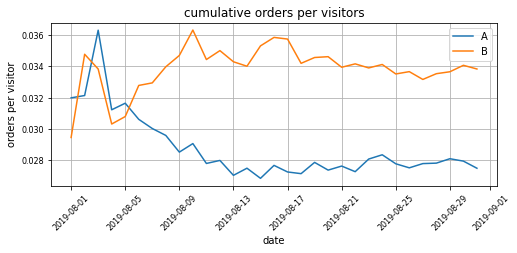

In [27]:
# подготовка кумулятивных данных
A_clean = (
    clean_orders.
    query('group == "A"').
    groupby('date').
    agg({'revenue':'sum', 'transactionId':'nunique'}).
    merge(visitors.query('group =="A"'), on='date')
    )
A_clean = A_clean.rename(columns={'transactionId':'orders'})
A_clean['cum_orders'] = A_clean.apply(lambda x: A_clean[A_clean.date <= x.date].agg({'orders':'sum'}), axis=1)
A_clean['cum_visitors'] = A_clean.apply(lambda x: A_clean[A_clean.date <= x.date].agg({'visitors':'sum'}), axis=1)

B_clean = (
    clean_orders.
    query('group == "B"').
    groupby('date').
    agg({'revenue':'sum', 'transactionId':'nunique'}).
    merge(visitors.query('group =="B"'), on='date')
    )
B_clean = B_clean.rename(columns={'transactionId':'orders'})
B_clean['cum_orders'] = B_clean.apply(lambda x: B[B_clean.date <= x.date].agg({'orders':'sum'}), axis=1)
B_clean['cum_visitors'] = B_clean.apply(lambda x: B[B_clean.date <= x.date].agg({'visitors':'sum'}), axis=1)

# график
plt.figure(figsize=(8,3))
plt.plot(A_clean.date, A_clean.cum_orders / A_clean.cum_visitors, label='A')
plt.plot(B_clean.date, B_clean.cum_orders / B_clean.cum_visitors, label='B')
plt.legend()
plt.title('cumulative orders per visitors')
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('orders per visitor')
plt.xlabel('date')
plt.grid()
plt.show();

The graphs have leveled off, although it was not possible to completely get rid of the previously identified spikes. It seems that they are still not caused by abnormal customers or abnormal orders, but by the market or advertising

**Decision**.
- we can stop the test because the metrics have fixed
- test result: clients of group B show a higher number of purchases per number of visitors relative to the clients of group A. The difference is statistically significant
- I recommend implementing changes for all users
- Still recommend involving an analyst in the preparation of the next tests, because there is something to improve. There are two confirmations:
    - the groups did not turn out equal, which indicates an uneven distribution of customers into groups during the test 
    - some clients fell into both groups at once